# Ice-age dynamics: Dating
----

## Single decay

The differential equations for *parent*- and *daugther*-isotopes, $P(t)$ and $D(t)$, read:
$$
\begin{array}{rcl}
P(t) & = & P_0 e^{\displaystyle - \lambda t} \\
D(t) & = & P_0 \left( 1 - e^{\displaystyle - \lambda t} \right)
\end{array}
$$

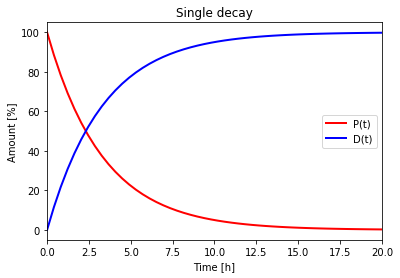

In [1]:
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

def n1n2(lambda1):
    # define solutions for parent and daughter isotopes
    t = np.linspace(0,20, num=50)
    p1 = 100*np.e**(-lambda1*t)
    d1 = 100*(1-np.e**(-lambda1*t))
    # call plotting functions
    plt.figure(2)
    #plt.figure(figsize=(12.0, 6.0))
    plt.title('Single decay')
    plt.xlim([0,20])
    plt.xlabel('Time [h]')
    plt.ylim([-5,105])
    plt.ylabel('Amount [%]')
    plt.plot(t,p1,linewidth=2,color='red',label='P(t)')
    plt.plot(t,d1,linewidth=2,color='blue',label='D(t)')
    plt.legend(loc='center right')
    plt.show()
    
# call interactive module
interactive_plot = interactive(n1n2, lambda1=widgets.FloatSlider(min=0.1,max=2.0,step=0.1,value=0.70))
output = interactive_plot.children[-1]
interactive_plot

## Decay series

The differential equations for *parent*- and *daugther*-isotopes, $P(t)$ and $D(t)$, read:
$$
\begin{array}{rcl}
P_1(t) & = & P_1^0 e^{\displaystyle -\lambda_1 t} \\
P_2(t) & = & \frac{\displaystyle \lambda_1}{\displaystyle \lambda_1 - \lambda_2} P_1^0 \left( e^{\displaystyle -\lambda_1 t} - e^{\displaystyle -\lambda_2 t} \right)
            + P_2^0 e^{\displaystyle -\lambda_2 t} \\
D(t) & = & P_1^0 \left( 1 
                     - \frac{\displaystyle \lambda_2}{\displaystyle \lambda_2 - \lambda_1} e^{\displaystyle -\lambda_1 t} 
                     - \frac{\displaystyle \lambda_1}{\displaystyle \lambda_1 - \lambda_2} e^{\displaystyle -\lambda_2 t}
                \right)
\end{array}
$$

In [ ]:
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

def n1n2n3(lambda1,lambda2):
    # define solutions for parent and daughter isotopes
    t = np.linspace(0,20, num=50)
    n1 = 100*np.e**(-lambda1*t)
    n2 = 100*lambda1/(lambda2-lambda1)*(np.e**(-lambda1*t) - np.e**(-lambda2*t))
    n3 = 100*(1 - lambda2/(lambda2-lambda1)*np.e**(-lambda1*t) - lambda1/(lambda1-lambda2)*np.e**(-lambda2*t))
    # call plotting functions
    plt.figure(2)
    #plt.figure(figsize=(12.0, 6.0))
    plt.title('Decay series')
    plt.xlim([0,20])
    plt.xlabel('Time [h]')
    plt.ylim([-5,105])
    plt.ylabel('Amount [%]')
    plt.plot(t,n1,linewidth=2,color='red',label='P$_1$(t)')
    plt.plot(t,n2,linewidth=2,color='green',label='P$_2$(t)')
    plt.plot(t,n3,linewidth=2,color='blue',label='P$_3$(t)')
    plt.legend(loc='center right')
    plt.show()
    
# call interactive module
interactive_plot = interactive(n1n2n3, lambda1=widgets.FloatSlider(min=0.1,max=2.0,step=0.1,value=0.70),
                                       lambda2=widgets.FloatSlider(min=0.1,max=10.0,step=0.1,value=0.15))
output = interactive_plot.children[-1]
interactive_plot